<a href="https://colab.research.google.com/github/DIFACQUIM/Cursos/blob/main/09_Enumeraci%C3%B3n_de_compuestos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Enumeración de bibliotecas químicas

---

Elaboró: Fernanda I. Saldivar González  COntacto: fer.saldivarg@gmail.com



### Representación de reacciones usando SMILES

1. Instalar el faerun. Ver documentación

In [1]:
!pip install faerun-notebook==0.1.5b0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.0/535.0 kB 5.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl (1.6 MB)
  Created wheel for faerun-notebook: filename=faerun_notebook-0.1.5b0-py2.py3-none-any.whl size=470156 sha256=779615af373d748769b5706dbdee795b98ba2d056ff22eb1ad93b9a35ffaa91a
  Stored in directory: /root/.cache/pip/wheels/92/d6/0e/c24e55ea7bb33143c61a11fb03b609cff740f24875d0bf4fad
Successfully built faerun-notebook


2. Importar las siguientes funciones:

In [2]:
import ipywidgets as widgets
from faerun_notebook import SmilesDrawer
from google.colab import output
output.enable_custom_widget_manager()

3. Con la herramienta SmilesDrawer, colocar en las primeras comillas el título, en las segundas los dos reactivos separados por un punto y finalmente, separado entre ">>" está el producto de la reacción.
Adicionalmente se colocó un tema, fondo y tamaño de la representación.

Nota: SmilesDrawer es un componente capaz de analizar y dibujar estructuras moleculares codificadas con SMILES. Puede dibujar estructuras con estereoquímicas complejas sin usar plantilla y aún así tiene una huella computacional muy baja. Además tiene bajo uso de memoria sin necesidad de cargar imágenes. Estas caracteristicas permiten la representación de miles de dibujos de estructuras moleculares en una sóla página web

In [ ]:
SmilesDrawer(value=[
    ("Condensación aldolica", "C1=CC=C(C=C1)C=O.CC(=O)C>>C1=CC=C(C=C1)C=CC(=O)C=CC2=CC=CC=C2")], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Condensación aldolica', 'C1…

Para unir los dos elementos descritos, únicamente se colocan en el corchete separados por comas y dentro de un paréntesis

In [ ]:
SmilesDrawer(value=[
    ("Condensación aldolica", "C1=CC=C(C=C1)C=O.CC(=O)C>>C1=CC=C(C=C1)C=CC(=O)C=CC2=CC=CC=C2"),
    ("Ácido tereftálico", "C1=CC(=CC=C1C(=O)O)C(=O)O"),
    ("Una molécula", "CNCNCCN")
], theme='dark', background="#1e1e1e", options={'scale': 1.25})

SmilesDrawer(background='#1e1e1e', options={'scale': 1.25}, theme='dark', value=[('Condensación aldolica', 'C1…

Además del tema, se pueden cambiar distintos elementos gráficos como el grosor de las lineas

In [ ]:
SmilesDrawer(value="C1=CC=C(C=C1)C=O.CC(=O)C>>C1=CC=C(C=C1)C=CC(=O)C=CC2=CC=CC=C2", theme='matrix', background="#000000", options={'scale': 1.5, 'bondThickness': 2.5})

SmilesDrawer(background='#000000', options={'scale': 1.5, 'bondThickness': 2.5}, theme='matrix', value='C1=CC=…

### Enumeración de bibliotecas mediante el uso de reacciones químicas

In [4]:
!pip install rdkit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 67.0 MB/s eta 0:00:00


In [16]:
import pandas as pd
import rdkit as rk
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import CalcNumHeteroatoms
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem import rdMolDescriptors




In [7]:
# Read building blocks using a Supplier
supp = Chem.SDMolSupplier('/content/Sigma_bb.sdf')
for mol in supp:
    if mol is not None: mol.GetNumAtoms()

[19:15:19] atom 2 has specified valence (2) smaller than the drawn valence 3.


In [8]:
# Create a list of molecules
mols = [x for x in supp]
len(mols) #Number of building blocks


[19:15:23] atom 2 has specified valence (2) smaller than the drawn valence 3.


28355

/usr/local/lib/python3.10/dist-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  warnings.warn(


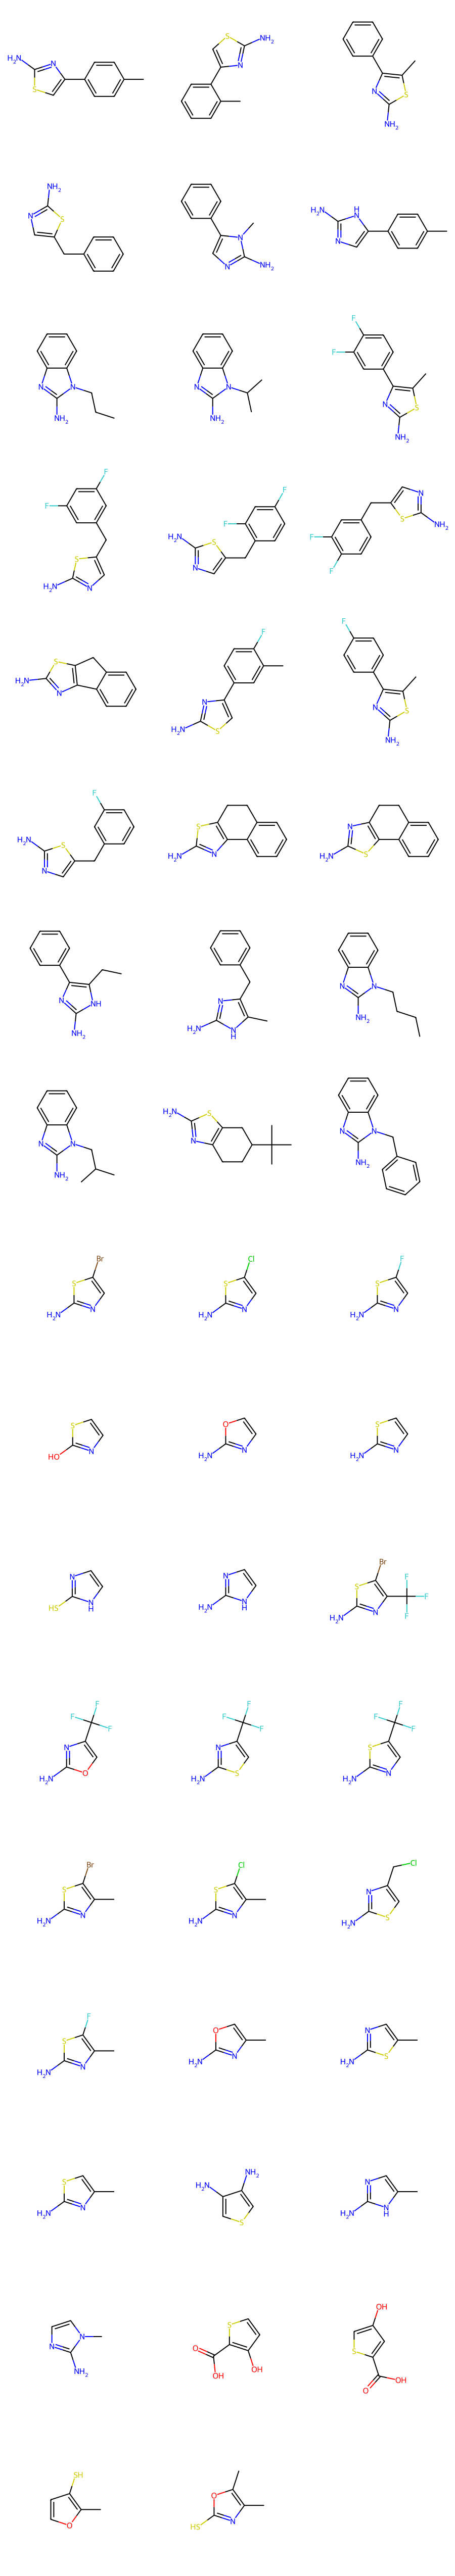

In [9]:
# Match a substructure with a SMARTS query

#SMARTS 5-membered heterocycles
patt1= Chem.MolFromSmarts('[$([NX3;H2;!$(NC=O)]),$([#16X2H]),$([OX2H])]-[cr5;$([cr5]:1:[nr5,or5,sr5]:[cr5]:[cr5]:[nr5,or5,sr5]:1),$([cr5]:1:[cr5]:[nr5,or5,sr5]:[cr5]:[cr5]:1)]')
het5 = [x for x in mols if x.HasSubstructMatch(patt1)]
from rdkit.Chem import Draw
Draw.MolsToGridImage(list(het5), subImgSize=(300,300))

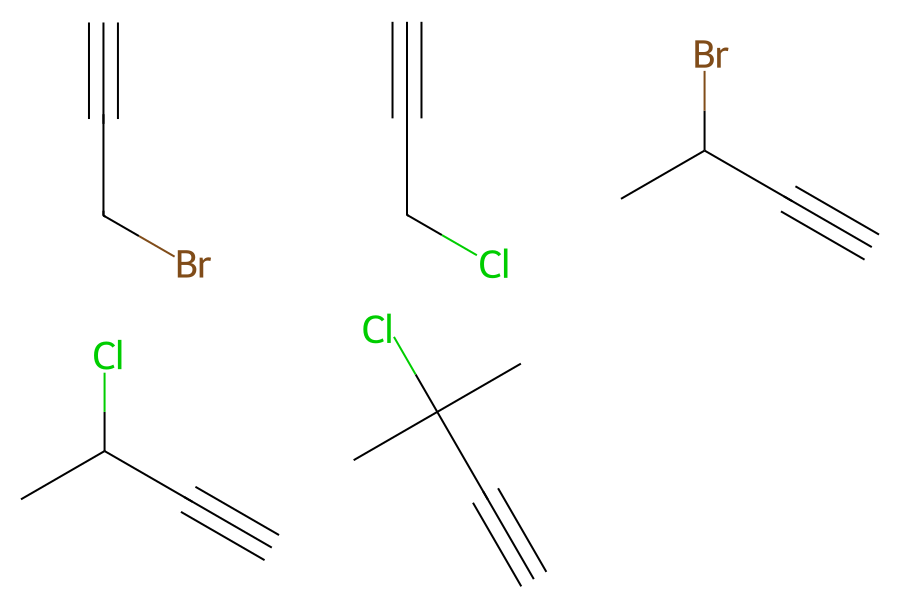

In [10]:
#SMARTS Terminal alkyne 3-bromo or chloro substituted
patt2= Chem.MolFromSmarts('[Br,Cl][#6]C#[CH1]')
alkynes = [x for x in mols if x.HasSubstructMatch(patt2)]
Draw.MolsToGridImage(list(alkynes), subImgSize=(300,300))

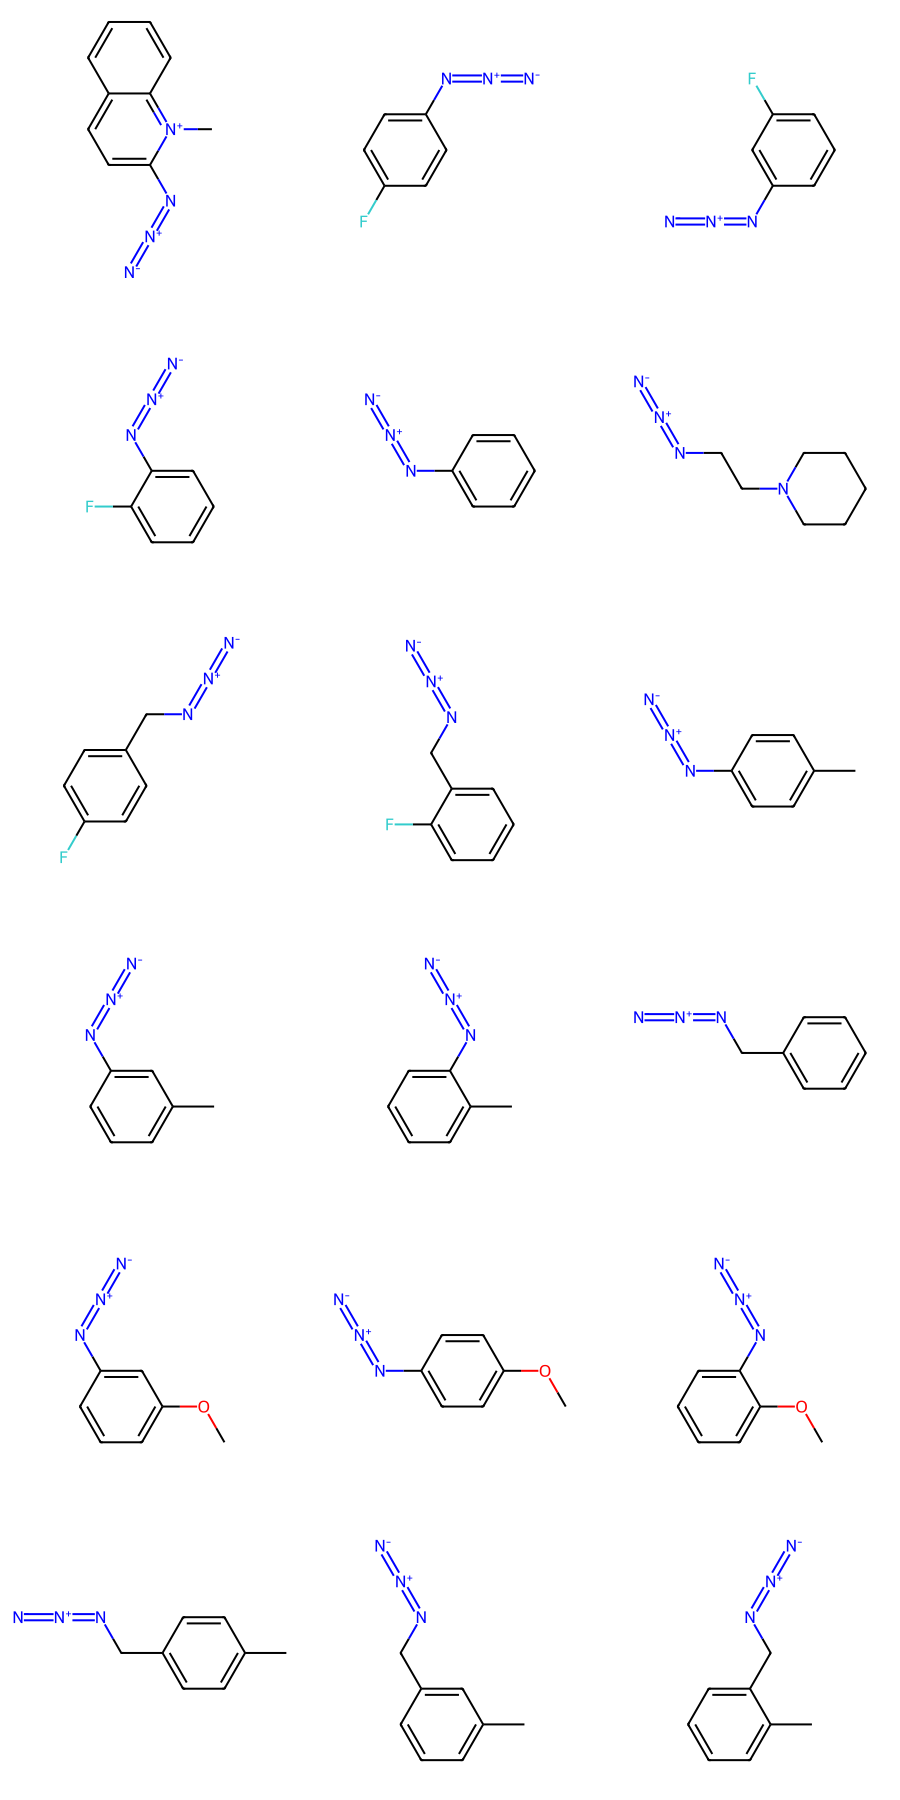

In [11]:
#SMARTS Azide
patt3= Chem.MolFromSmarts('[N;H0;$(N-[#6]);D2]=[N;D2]=[N;D1]')
azide = [x for x in mols if x.HasSubstructMatch(patt3)]
Draw.MolsToGridImage(list(azide), subImgSize=(300,300))

In [12]:
# Setting up coupling reactions

#Nucleophilic Substitutuion
rxn=AllChem.ReactionFromSmarts('[#6;a;r5:1]-[$([NX3;H2;!$(NC=O)]),$([#16X2H]),$([OX2H]):2].[#35,#17]-[#6:3][C:4]#[C:5]>>[#6;a;r5:1]-[$([NX3;H]),$([#16X2]),$([OX2]):2]-[#6:3][C:4]#[C:5]')

prods1 = AllChem.EnumerateLibraryFromReaction(rxn,[het5,alkynes])
smis = list(set([Chem.MolToSmiles(x[0],isomericSmiles=True) for x in prods1]))

#Click reaction

rxn2= AllChem.ReactionFromSmarts('[#6:7][C:6]#[CH1:5].[#6:4]-[#7:3]=[N+]=[#7-]>>[#6:4]-[#7:3]-1-[#6:5]=[#6:6](-[#6:7])-[#7]=[#7]-1 |c:10,t:7|')
prods2 = AllChem.EnumerateLibraryFromReaction(rxn2,[[ Chem.MolFromSmiles(x) for x in smis ],azide])
smis2 = list(set([Chem.MolToSmiles(x[0],isomericSmiles=True) for x in prods2]))
len(smis2)

7884

In [13]:
smis2

['Fc1cccc(Cc2cnc(NCC3=CN(Cc4ccccc4F)N=N3)s2)c1',
 'Cc1ccccc1N1C=C(C(C)Sc2nc(C)c(C)o2)N=N1',
 'C[n+]1c(N2C=C(CNc3nc(C4CC4)cs3)N=N2)ccc2ccccc21',
 'CC(C)c1cnc(NCC2=CN(Cc3ccc(F)cc3)N=N2)s1',
 'CC(C)(Nc1ncc[nH]1)C1=CN(CCN2CCCCC2)N=N1',
 'Cc1ccc(-c2cnc(NC(C)C3=CN(c4ccccc4C)N=N3)[nH]2)cc1',
 'Cc1ccc(CN2C=C(CNc3nc4c(s3)-c3ccccc3CC4)N=N2)cc1',
 'CC(Nc1nc2ccccc2n1C)C1=CN(c2ccccc2)N=N1',
 'Cc1cccc(CN2C=C(CNc3nc4ccc(F)cc4s3)N=N2)c1',
 'Fc1ccc(CN2C=C(CNc3nc4ccccc4s3)N=N2)cc1',
 'Cc1cccc(N2C=C(C(C)Nc3nc(-c4ccc(F)c(F)c4)cs3)N=N2)c1',
 'COc1ccc2[nH]c(SCC3=CN(c4ccc5ccccc5[n+]4C)N=N3)nc2c1',
 'CC(C)(Nc1ncc(-c2ccc(Br)cc2)[nH]1)C1=CN(CCN2CCCCC2)N=N1',
 'CC(Nc1nc2ccccc2[nH]1)C1=CN(c2ccccc2)N=N1',
 'Cc1ccc(N2C=C(C(C)Nc3ncc(C(C)C)s3)N=N2)cc1',
 'Cc1ccc(N2C=C(CNc3ncc(C(C)C)s3)N=N2)cc1',
 'CC(C)(Nc1nc2ccc(Cl)cc2s1)C1=CN(c2ccccc2F)N=N1',
 'CC(C)(Nc1nc(C(F)(F)F)co1)C1=CN(Cc2ccccc2)N=N1',
 'CC(Nc1ncc(-c2cccc(Cl)c2)o1)C1=CN(CCN2CCCCC2)N=N1',
 'Fc1ccc(N2C=C(CSc3nc4cccc(F)c4s3)N=N2)cc1',
 'Cc1ccc(CN2C=C(C(C)Nc3nc(C

In [14]:
#Export results as .CSV File
df = pd.DataFrame(smis2, columns=["colummn"])
df.to_csv('bis_heterocycles.csv', index=False)
df

,colummn
0,Fc1cccc(Cc2cnc(NCC3=CN(Cc4ccccc4F)N=N3)s2)c1
1,Cc1ccccc1N1C=C(C(C)Sc2nc(C)c(C)o2)N=N1
2,C[n+]1c(N2C=C(CNc3nc(C4CC4)cs3)N=N2)ccc2ccccc21
3,CC(C)c1cnc(NCC2=CN(Cc3ccc(F)cc3)N=N2)s1
4,CC(C)(Nc1ncc[nH]1)C1=CN(CCN2CCCCC2)N=N1
...,...
7879,Cn1c(SC(C)(C)C2=CN(Cc3ccc(F)cc3)N=N2)nc2ccccc21
7880,CC(Nc1ncc(Cc2ccc(F)c(F)c2)s1)C1=CN(c2ccc3ccccc...
7881,CC(C)(C)c1nc(NCC2=CN(c3ccccc3F)N=N2)sc1Br
7882,Cc1ccc(CN2C=C(C(C)(C)Nc3nc4c(s3)Cc3ccccc3-4)N=...


['colummn', 'Molecule']


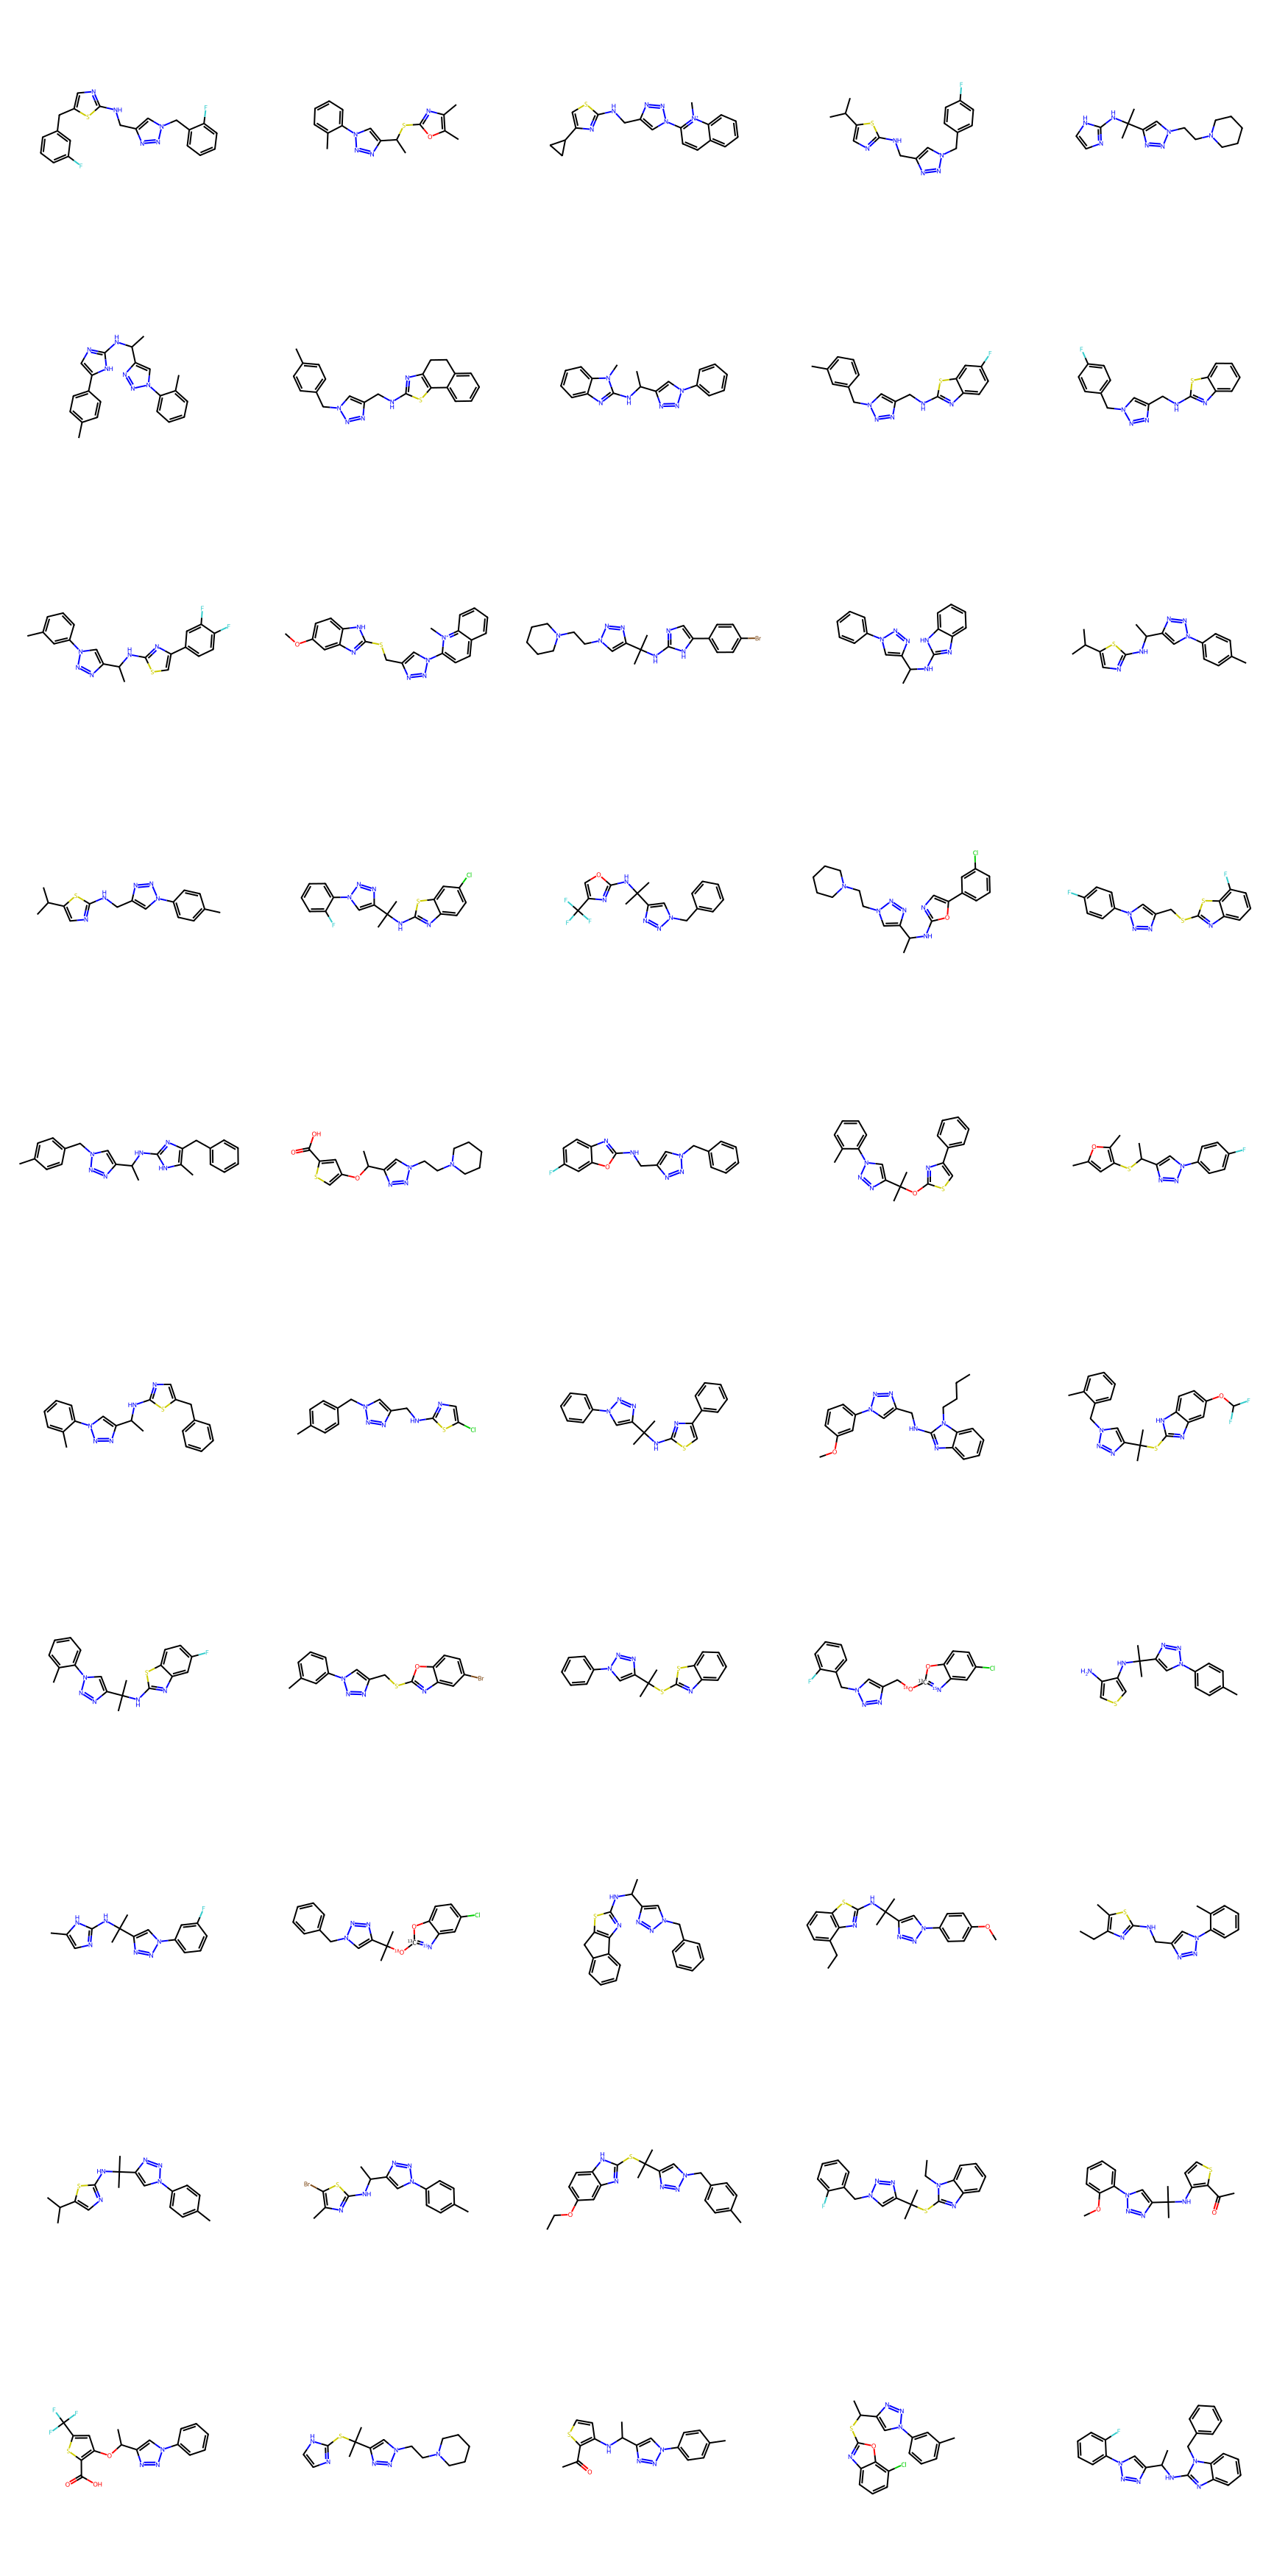

In [20]:
PandasTools.AddMoleculeColumnToFrame(df,'colummn','Molecule',includeFingerprints=True)
print([str(x) for x in  df.columns])

PandasTools.FrameToGridImage(df,column= 'Molecule', molsPerRow=5,subImgSize=(350,350))

**Para saber más:**
* Chevillard F, Kolb P (2015) SCUBIDOO: A Large yet Screenable and Easily Searchable Database of Computationally Created Chemical Compounds Optimized toward High Likelihood of Synthetic Tractability. J Chem Inf Model. 55:1824-35.
* Dorschner KV, Toomey D, Brennan MP, Heinemann T, Duffy FJ, Nolan KB, Cox D, Adamo MF, Chubb AJ (2011) TIN-a combinatorial compound collection of synthetically feasible multicomponent synthesis products. J Chem Inf Model. 51:986-95.
* Humbeck L, Weigang S, Schäfer T, Mutzel P, Koch O (2018) CHIPMUNK: A virtual synthesizable small-molecule library for medicinal chemistry, exploitable for protein-protein interaction modulators. ChemMedChem. 13:532–539.
* Lessel U, Wellenzohn B, Lilienthal M, Claussen H (2009) Searching fragment spaces with feature trees. J Chem Inf Model. 49:270–279.
* Massarotti A, Brunco A, Sorba G, Tron GC (2014) ZINClick: a database of 16 million novel, patentable, and readily synthesizable 1,4-disubstituted triazoles. J Chem Inf Model. 54:396-406. doi: 10.1021/ci400529h. Epub 2014 Jan 31. PMID: 24451008.
* Shafi S, Alam MM, Mulakayala N, Mulakayala C, Vanaja G, Kalle AM et al (2012) Synthesis of novel 2-mercapto benzothiazole and 1,2,3-triazole based bis-heterocycles: their anti-inflammatory and anti-nociceptive activities. Eur J Med Chem 49:324–333.
